<a href="https://colab.research.google.com/github/PreethikaShankar/ML_Algorithms/blob/main/Linear_Regression_Advertisement_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.3 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Handling Categorical Features](#section7)<br>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

##__Importing Packages__

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

# allow plots to appear directly in the notebook
%matplotlib inline

##__Importing the Dataset__

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

## 3. Exploratory Data Analysis

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

In [ ]:
f, axes = plt.subplots(2,2,sharex=True, figsize = (7,7)) ## creating vector space
sns.despine(left=True) ## giving y axis plot

sns.distplot(data.sales, color="b", ax=axes[0,0]) ## plots for distribution, axes

sns.distplot(data.TV, color="r", ax=axes[0,1])

sns.distplot(data.radio, color="g", ax=axes[1,0])

sns.distplot(data.newspaper, color="m", ax=axes[1,1])


__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

### Is there a relationship between sales and spend various advertising channels?

In [ ]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

#subplots migration
f = plt.figure()

for J in [JG1,JG2,JG3] :
  for A in J.fig.axes:
    f._axstack.add(f._make_key(A),A)


__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlaed where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

In [ ]:
sns.pairplot(data,size=3, aspect=1)

In [ ]:
sns.pairplot(data, x_vars=['', 'TV','radio', 'newspaper'], y_vars='sales', height=5, aspect=1, kind='reg')

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

### Calculating and plotting heatmap correlation

In [ ]:
data.corr() ## works only on numerical data

In [ ]:
sns.heatmap(data.corr(), annot=True)

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.

## 4. Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

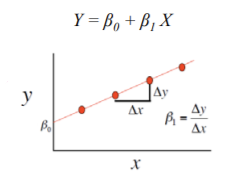

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

### 4.1 Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
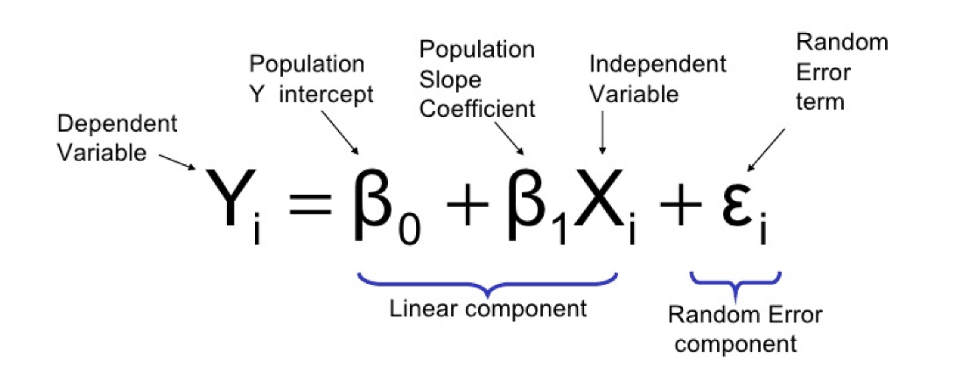
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.
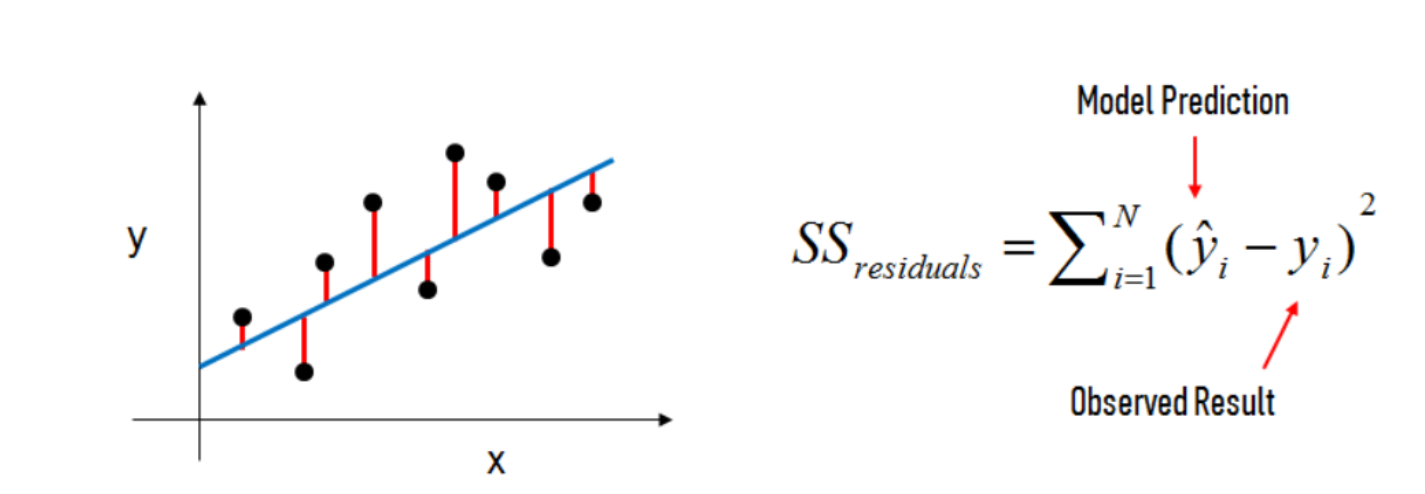


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

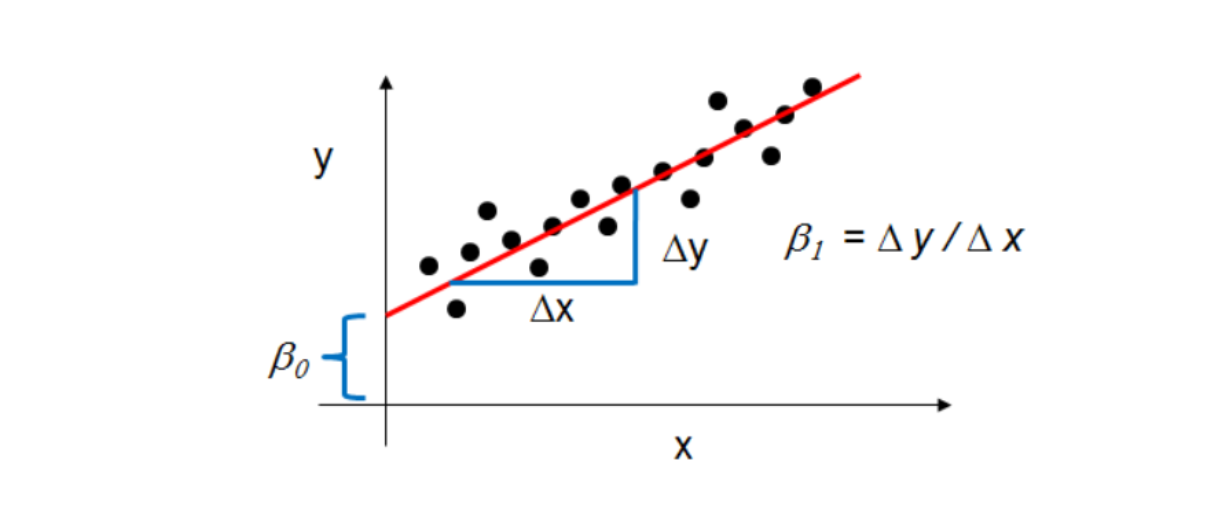

#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as __Autocorrelation__.
3. The independent variables should not be correlated. Absence of this phenomenon is known as __multicollinearity__.
4. The error terms must have constant variance. This phenomenon is known as __homoskedasticity__. The presence of non-constant variance is referred to __heteroskedasticity__.
5. The error terms must be normally distributed.

### 4.2 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.